In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classes/3rd Year/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


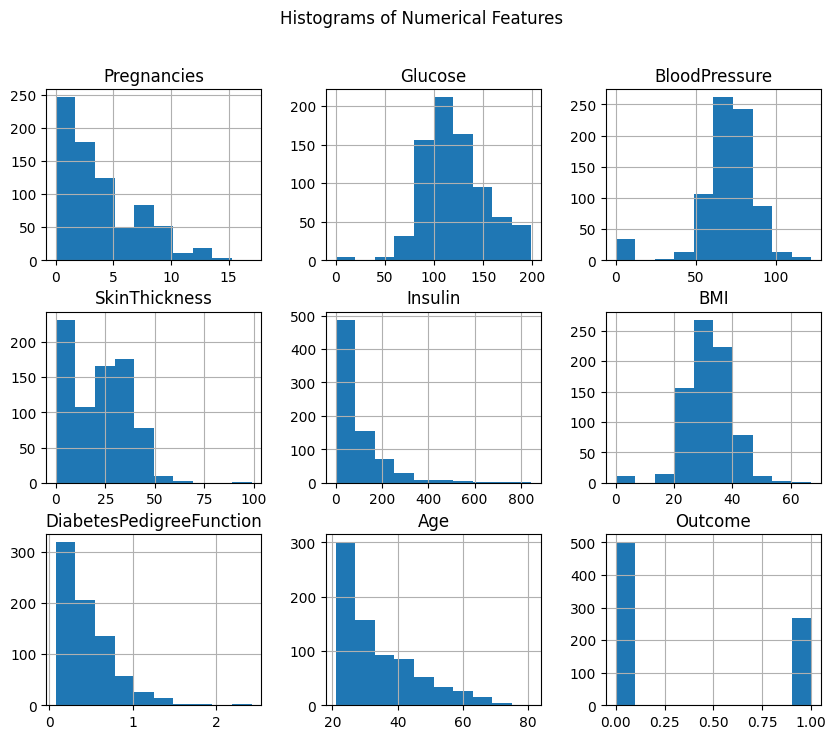

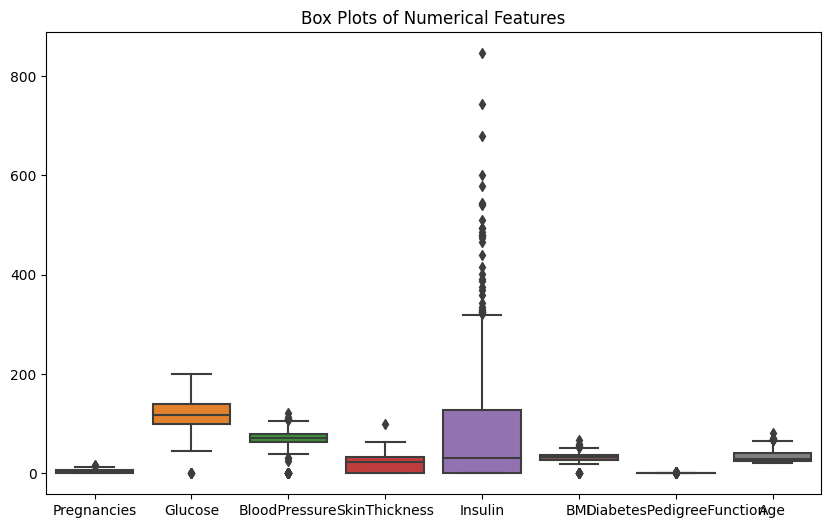

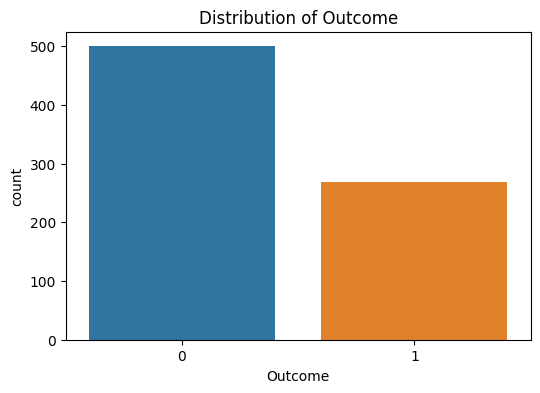

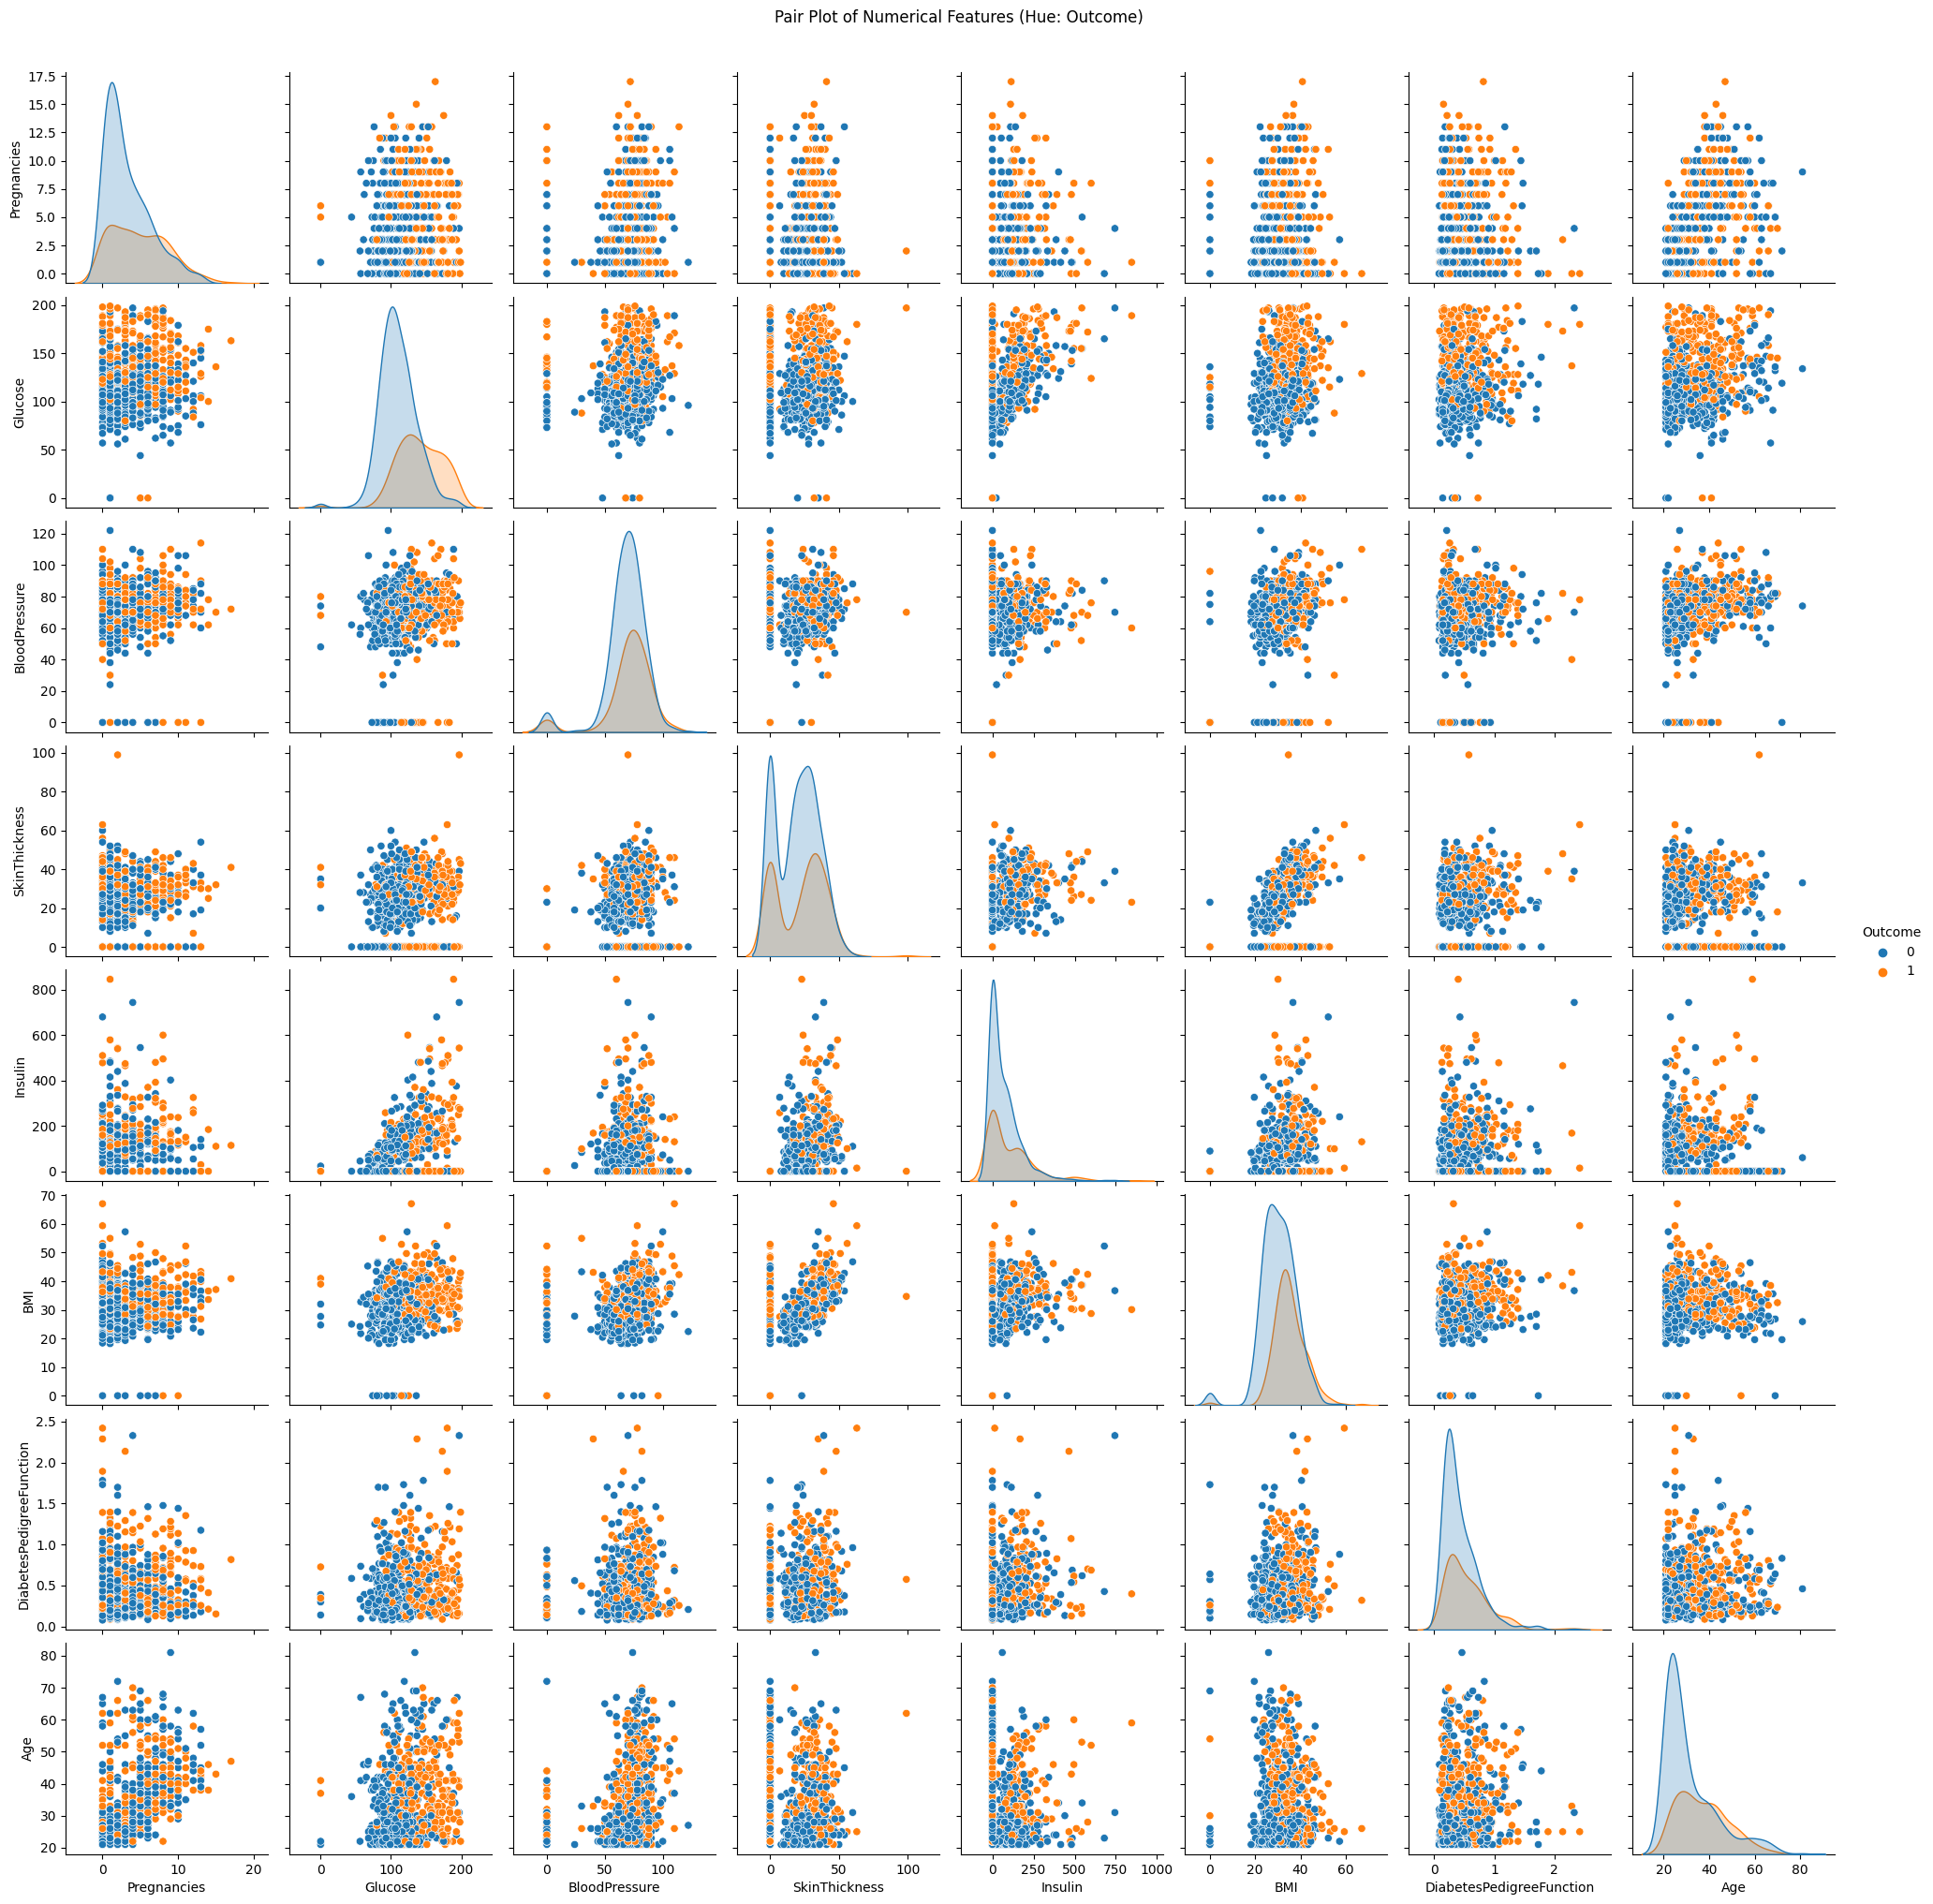

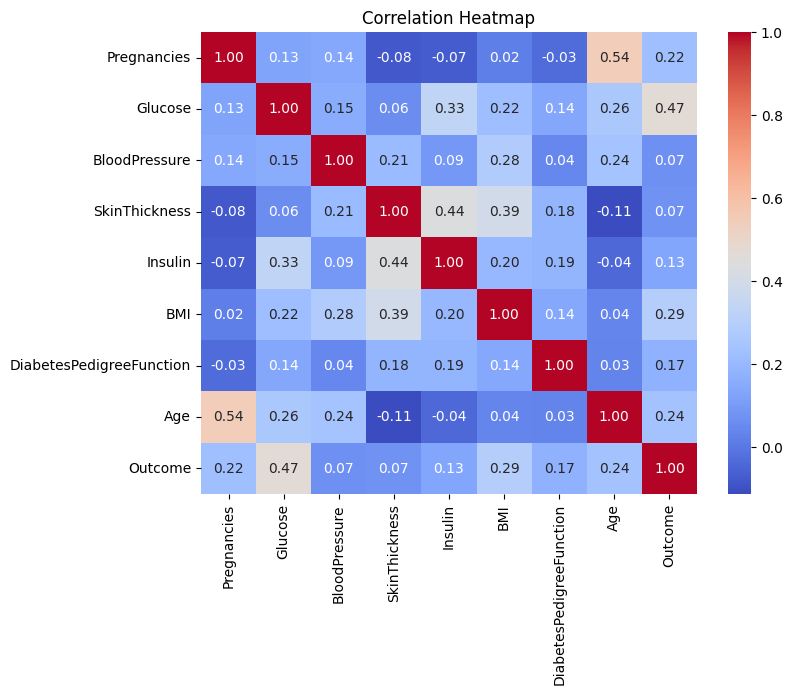

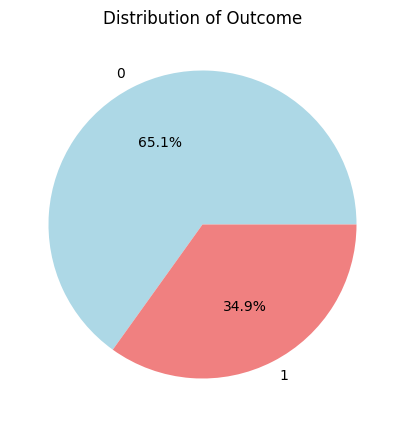

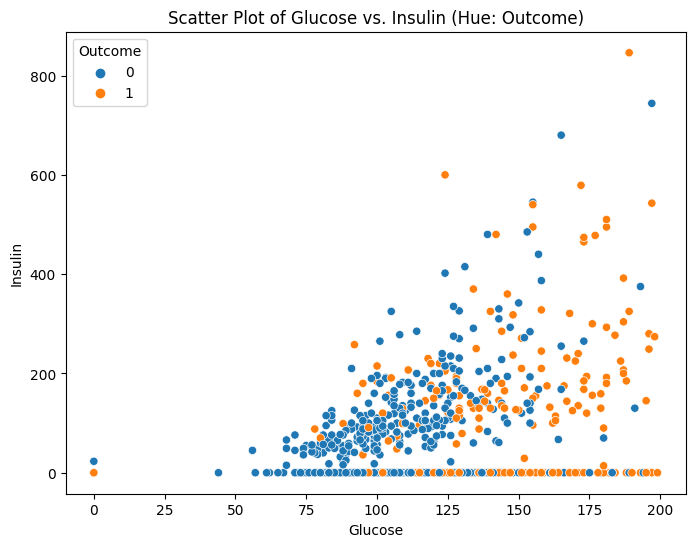

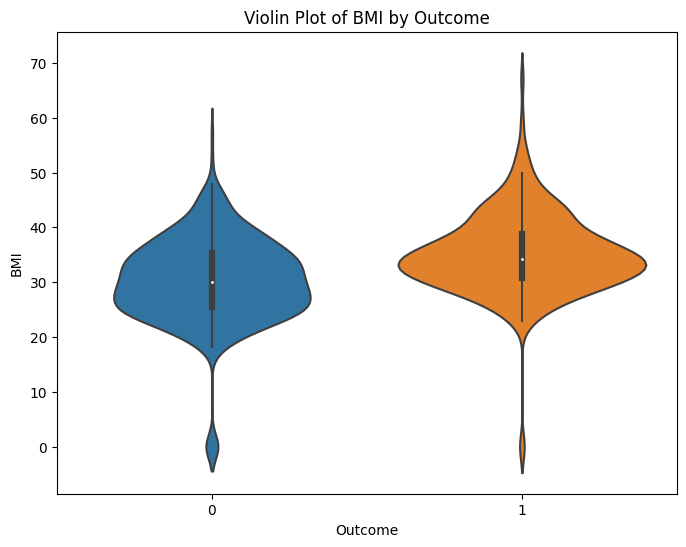

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# 1. Histograms
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# 2. Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.title("Box Plots of Numerical Features")
plt.show()

# 3. Bar Chart for 'Outcome'
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome")
plt.show()

# 4. Pair Plots
sns.pairplot(df, hue='Outcome')
plt.suptitle("Pair Plot of Numerical Features (Hue: Outcome)", y=1.02)
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 6. Pie Chart for 'Outcome' (Optional - Use if 'Outcome' has more than 2 classes)
plt.figure(figsize=(5, 5))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Outcome")
plt.ylabel('')
plt.show()

# 7. Scatter Plots (Optional - Choose specific feature combinations to visualize)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.title("Scatter Plot of Glucose vs. Insulin (Hue: Outcome)")
plt.show()

# 8. Violin Plots (Optional - Use for numerical features with 'Outcome' differentiation)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='BMI', data=df)
plt.title("Violin Plot of BMI by Outcome")
plt.show()


In [ ]:
true_count = len(df.loc[df['Outcome']== True])
false_count = len(df.loc[df['Outcome']== False])

(true_count, false_count)

(268, 500)

In [ ]:
from sklearn.model_selection import train_test_split

feature_columns = ['Pregnancies'	,'Glucose'	,'BloodPressure'	,'SkinThickness'	,'Insulin'	,'BMI',	'DiabetesPedigreeFunction',	'Age'	]
predicted_columns = ['Outcome']

In [ ]:
x = df[feature_columns].values
y = df[predicted_columns].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=10)

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming 'x_train' and 'x_test' are your feature matrices with missing values

# Create the SimpleImputer object with strategy='mean'
fill_values = SimpleImputer(strategy='mean')

# Fit and transform the training data with the imputer
x_train = fill_values.fit_transform(x_train)

# Transform the testing data using the same imputer
x_test = fill_values.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train,y_train.ravel())


RandomForestClassifier(random_state=10)

In [ ]:
predict_train_data = random_forest_model.predict(x_test)

from sklearn import metrics

print("Accuracy ={0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy =0.749
